# Intro to Models
## Lecture 5, EM212: Applied Data Science

# This lecture will introduce:

1. A public dataset
2. Exploratory analysis
3. Linear models
4. Performing 1-3 using Python

We will be taking time at the end of class to play with the tools we just used.

# Let's pretend you're Ariana Grande

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Ariana_Grande_%2832426961944%29_%28cropped%29.jpg/198px-Ariana_Grande_%2832426961944%29_%28cropped%29.jpg)
photo: Emma Sheehan

### You've decided to go jewelry shopping with your friends


![alt text](https://upload.wikimedia.org/wikipedia/commons/6/6f/Brillanten.jpg)
photo: Mario Sarto

# How would you use data on this shopping expedition?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/13-08-09-hongkong-by-RalfR-038.jpg/320px-13-08-09-hongkong-by-RalfR-038.jpg)
photo: Ralf Roletschek

### Diamonds Dataset (Wickham, 2009)


A data frame with 53940 rows and 10 variables:

 price: price in US dollars (326--18,823)

 carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

# An aside

`ggplot2` is an extremely popular free-visualization library.  To learn more about it and to try using R visit:

https://r4ds.had.co.nz/data-visualisation.html


We'll be using Python.  For a good intro to the language, try https://www.codecademy.com/learn/learn-python

The lines below setup the tools we'll be using:

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')

In [8]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [16]:
cut_ranking = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
print(cut_ranking)
clarity_ranking = 'I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF'.replace(' ', '').split(',')
print(clarity_ranking)
color_ranking = diamonds.loc[:,'color'].drop_duplicates().sort_values(ascending=False).values
print(color_ranking)

['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
['J' 'I' 'H' 'G' 'F' 'E' 'D']


In [19]:
columns_n_orders = {'cut': cut_ranking, 'clarity': clarity_ranking, 'color': color_ranking}

for column, ordering in columns_n_orders.items():
    diamonds.loc[:,column] = diamonds.loc[:,column]\
    .astype('category', ordered=True, categories=ordering)

We just made a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) to keep the column name and order we want together.  Then we [added the ordering the each column in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

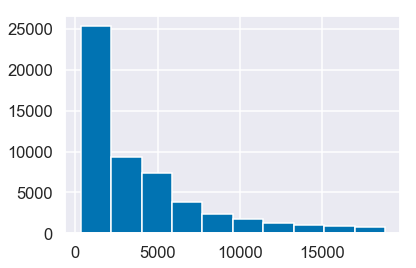

In [6]:
# a simple histogram in pandas

diamonds.price.hist()

In [7]:
# basic statistics in pandas

diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


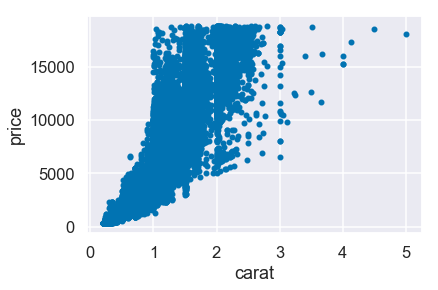

In [8]:
# a simple scatterplot 

diamonds.plot.scatter('carat', 'price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


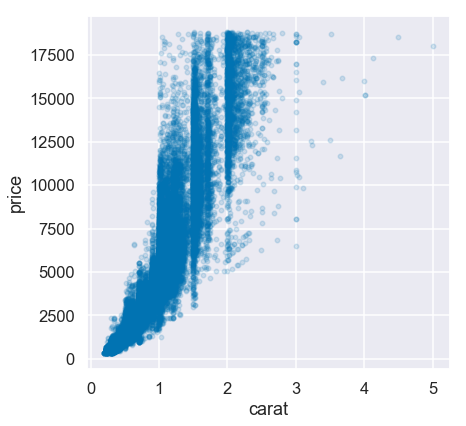

In [9]:
# a more easy to read scatterplot 
f, ax = plt.subplots(figsize=(6.5, 6.5))
diamonds.plot.scatter('carat', 'price', alpha=0.15,ax=ax)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


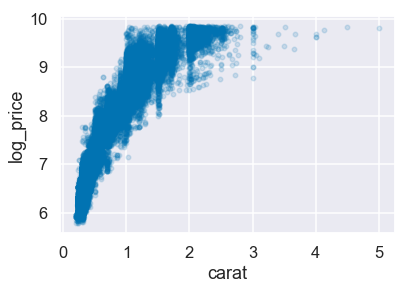

In [10]:
diamonds.loc[:,'log_price'] = np.log(diamonds.loc[:,'price'])
diamonds.plot.scatter('carat', 'log_price', alpha=0.15)

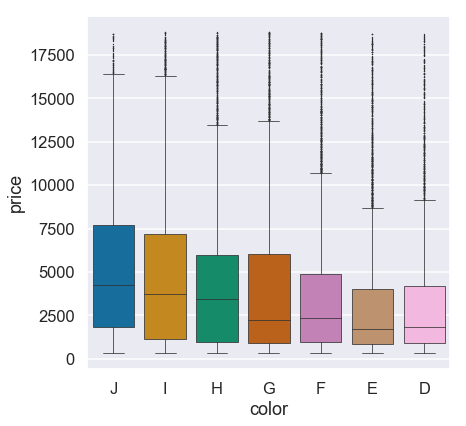

In [10]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.boxplot(x="color", y="price", data=diamonds, fliersize=0.5, linewidth=0.75, ax=ax)

Plotting the other categorical variables is left to the reader.

What general trends do we see with relation to these rankings?

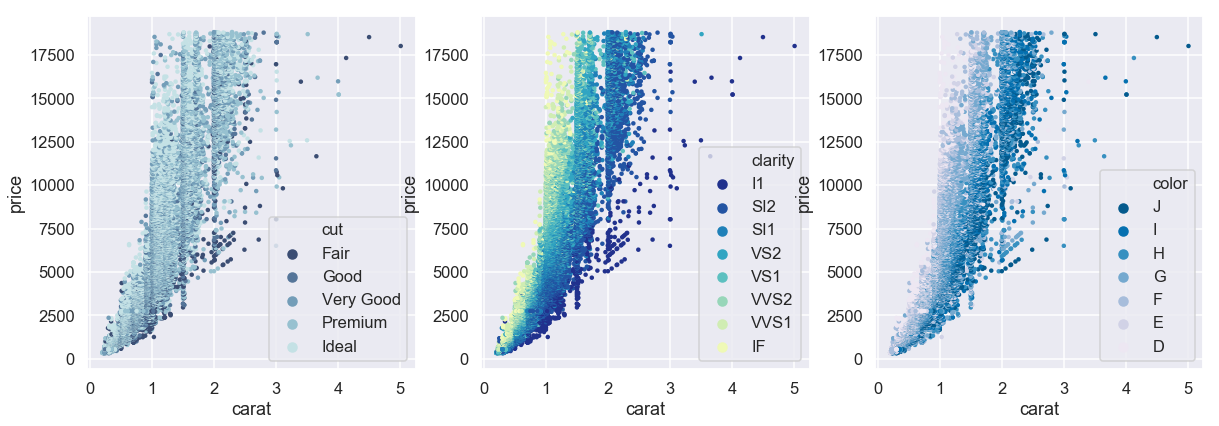

In [30]:
f, ax = plt.subplots(1, 3, figsize=(20, 6.5))
plot_info = pd.Series(columns_n_orders).reset_index()
plot_info.loc[:, 'palettes'] = ["ch:r=-.2,d=.3_r", 'YlGnBu_r', 'PuBu_r']
plot_info.rename(columns={'index': 'column_name', 0: 'ordering'}, inplace=True)
for i in plot_info.index:
    sns.scatterplot(x="carat", y="price",
                hue=plot_info.loc[i, 'column_name'],
                palette=plot_info.loc[i, 'palettes'],
                hue_order=plot_info.loc[i, 'ordering'],
                marker='.', linewidth=0,
                data=diamonds, ax=ax[i])

We can express these relationships as well using crosstabs.  Pandas will allow us to [group](https://pandas.pydata.org/pandas-docs/version/0.22/groupby.html) our data based on these categories and we can fill each cell with the average price or carat size.

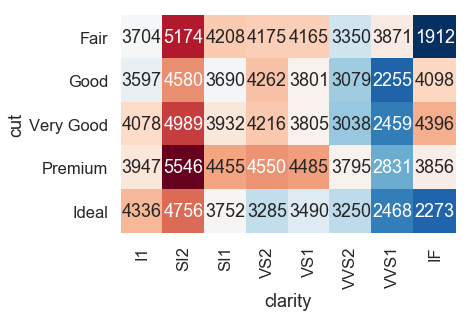

In [12]:
sns.heatmap(diamonds.groupby(['cut', 'clarity'])['price'].mean().unstack(),
            annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

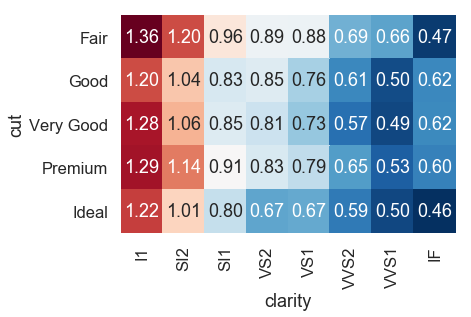

In [13]:
sns.heatmap(diamonds.groupby(['cut', 'clarity'])['carat'].mean().unstack(),
            annot=True, cbar=False, fmt='.2f', cmap='RdBu_r')

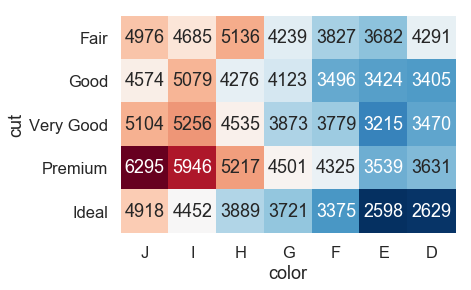

In [14]:
sns.heatmap(diamonds.groupby(['cut', 'color'])['price'].mean().unstack(),
            annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

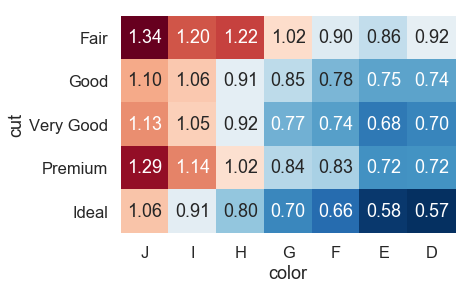

In [15]:
sns.heatmap(diamonds.groupby(['cut', 'color'])['carat'].mean().unstack(),
            annot=True, cbar=False, fmt='.2f', cmap='RdBu_r')

The last two heatmaps are left to the reader

# Enough visualization

Clearly there are various factors in the price of a diamond and they have their own relationships. 

Let's build a model

In [13]:
smf.ols('price ~ carat', data=diamonds).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 2.981e+05
Date:                Thu, 14 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:00:38   Log-Likelihood:                -26729.
No. Observations:               53940   AIC:                         5.346e+04
Df Residuals:                   53938   BIC:                         5.348e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2150      0.003   1856.116      0.000       6.208       6.222
carat          1.9698      0.004    545.978      0.000       1.963       1.977
==============================================================================
Omnibus:                    10805.529   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71366.235
Skew:                          -0.804   Prob(JB):                         0.00
Kurtosis:                       8.401   Cond. No.                         3.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

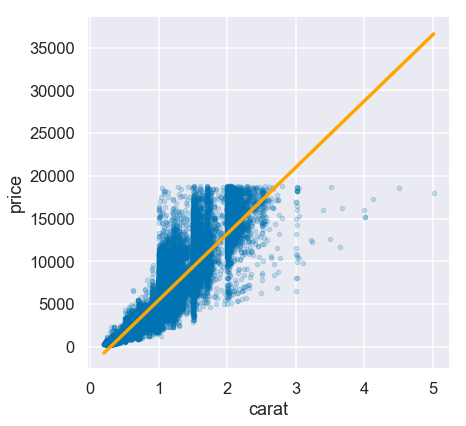

In [17]:
plt.subplots(figsize=(6.5, 6.5))
sns.regplot('carat', 'price', data=diamonds, marker='.',
            scatter_kws={'alpha':'0.2'}, line_kws={'color':'orange'}, truncate=True)

In [20]:
smf.ols('price ~ carat + cut + color + clarity', data=diamonds).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 2.387e+04
Date:                Thu, 14 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:02:16   Log-Likelihood:                -18162.
No. Observations:               53940   AIC:                         3.636e+04
Df Residuals:                   53921   BIC:                         3.653e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.7726      0.016    292.965      0.000       4.741       4.805
cut[T.Good]          0.0504      0.010      5.118      0.000       0.031       0.070
cut[T.Very Good]     0.0589      0.009      6.423      0.000       0.041       0.077
cut[T.Premium]       0.0569      0.009      6.280      0.000       0.039       0.075
cut[T.Ideal]         0.0841      0.009      9.369      0.000       0.067       0.102
color[T.I]           0.1621      0.008     20.523      0.000       0.147       0.178
color[T.H]           0.3188      0.007     42.737      0.000       0.304       0.333
color[T.G]           0.4517      0.007     62.073      0.000       0.437       0.466
color[T.F]           0.5280      0.007     71.134      0.000       0.513       0.543
color[T.E]           0.5247      0.007     70.299      0.000       0.510       0.539
color[T.D]           0.5804      0.008     74.142      0.000       0.565       0.596
clarity[T.SI2]       0.5417      0.013     41.285      0.000       0.516       0.567
clarity[T.SI1]       0.7251      0.013     55.499      0.000       0.699       0.751
clarity[T.VS2]       0.8193      0.013     62.366      0.000       0.794       0.845
clarity[T.VS1]       0.8827      0.013     66.174      0.000       0.857       0.909
clarity[T.VVS2]      0.9316      0.014     67.819      0.000       0.905       0.959
clarity[T.VVS1]      0.9419      0.014     66.688      0.000       0.914       0.970
clarity[T.IF]        1.0259      0.015     67.168      0.000       0.996       1.056
carat                2.1975      0.004    623.348      0.000       2.191       2.204
==============================================================================
Omnibus:                    17107.215   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145614.478
Skew:                          -1.285   Prob(JB):                         0.00
Kurtosis:                      10.628   Cond. No.                         38.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

But perhaps this is the wrong way to handle it.  Statsmodles has assumed that there isn't a linear relationship within cut or clarity or color, which isn't true.

In [21]:
for c in ['cut', 'color', 'clarity']:
    diamonds.loc[:,'%s_codes' % c] = diamonds.loc[:,'%s' % c].cat.codes


In [22]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,cut_codes,color_codes,clarity_codes
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897,4,5,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897,3,5,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960,1,5,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141,3,1,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131,1,0,1


In [24]:
smf.ols('price ~ carat + cut_codes + color_codes + clarity_codes', data=diamonds).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 9.887e+04
Date:                Thu, 14 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:02:39   Log-Likelihood:                -20140.
No. Observations:               53940   AIC:                         4.029e+04
Df Residuals:                   53935   BIC:                         4.033e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.4342      0.008    705.747      0.000       5.419       5.449
carat             2.1751      0.004    602.137      0.000       2.168       2.182
cut_codes         0.0174      0.001     12.592      0.000       0.015       0.020
color_codes       0.0862      0.001     91.698      0.000       0.084       0.088
clarity_codes     0.0894      0.001     89.078      0.000       0.087       0.091
==============================================================================
Omnibus:                    20374.043   Durbin-Watson:                   0.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           241443.562
Skew:                          -1.481   Prob(JB):                         0.00
Kurtosis:                      12.932   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Lab Section

If your data is available online you can [load it into pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) with a url to the csv or xls file

To get everyone started, here is some data from [Chu, 2001](http://jse.amstat.org/v9n2/datasets.chu.html)

carat: weight of diamond stones in carat units

color: Colour - D, E, F, G, H or I

clarity: IF, VVS1, VVS2, VS1 or VS2

Certification Body: GIA, IGI or HRD

price: Price (Singapore $)

In [52]:
straits_data = pd.read_csv('http://jse.amstat.org/v9n2/4Cdata.txt', sep = '\s+', names=['carat', 'color', 'clarity', 'certification', 'price_sg'])
straits_data.head()

,carat,color,clarity,certification,price_sg
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641


Some exploratory data analysis to share:
    
- Calculate basic statistics (mean, median, quantiles, etc.)
- Plot histograms, boxplots
- Calculate crosstabs
- Decide how to represent your data (merging, variable transformations)
- Scatterplot of continuous variables
- Perform simple regression models